# APLICAICÓN DE REDES NEURONALES PARA PREDECIR EL ESTADO NUTRIONAL DE GESTANTES


La salud materna representa uno de los pilares fundamentales en el desarrollo social, especialmente en regiones con altos índices de vulnerabilidad como Huancavelica, Perú. En este contexto, el monitoreo del estado nutricional de las gestantes permite anticipar riesgos tanto para la madre como para el recién nacido, lo cual es clave para mejorar los indicadores de salud pública.

El presente trabajo tiene como objetivo aplicar técnicas de aprendizaje automático para predecir el **diagnóstico nutricional CLAP** de gestantes huancavelicanas, utilizando variables sociodemográficas y clínicas contenidas en un conjunto de datos recolectado en la región. Para ello, se implementó un modelo de red neuronal, específicamente una arquitectura de tipo MLP (Multi-Layer Perceptron), entrenado con variables cuantitativas y cualitativas previamente procesadas.

Esta aplicación no solo busca mejorar la precisión diagnóstica, sino también sentar las bases para sistemas inteligentes de apoyo a la toma de decisiones en contextos de salud materna, contribuyendo así a políticas más efectivas en zonas rurales y con limitada cobertura médica.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Análisis exploratorio de Datos

## 1.1.  Cargar y visualizar el dataset

Para iniciar el análisis, se procedió con la carga del dataset titulado **"Gestantes Huancavelica.csv"**, el cual contiene información relevante de mujeres gestantes atendidas en establecimientos de salud del departamento de Huancavelica. Este conjunto de datos incluye variables tanto cuantitativas como cualitativas, relacionadas con factores sociodemográficos, condiciones clínicas, servicios recibidos y diagnóstico nutricional.

La visualización preliminar del dataset permite tener una idea general de la estructura de los datos, verificar su correcta importación, e identificar posibles valores nulos, codificaciones especiales o inconsistencias que requieran un proceso de limpieza o transformación.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Gestantes Huancavelica.csv to Gestantes Huancavelica.csv


In [ ]:
# Cargar los datos
df = pd.read_csv('Gestantes Huancavelica.csv')

In [ ]:
df = df[df['Departamento'] == 'HUANCAVELICA'].copy()

In [ ]:
df.replace(['', ' ', '--', 'NA', 'N/A'], np.nan, inplace=True)

/tmp/ipython-input-80-2710767595.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['', ' ', '--', 'NA', 'N/A'], np.nan, inplace=True)


In [ ]:
# Mostrar primeras filas del dataset
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,sw,Diresa,Red,Microred,EESS,Renipress,Edad,Fur,Peso,Talla,...,fecha_nacimiento,mes,dias,año,UbigeoREN,DepartamentoREN,ProvinciaREN,DistritoREN,AlturaREN,Dx_CLAP
0,1,HUANCAVELICA,ANGARAES,NO PERTENECE A NINGUNA MICRORED,II-1 - 00003943 - HOSPITAL DE LIRCAY,3943,17,25/11/2024,45.0,142.0,...,11/24/2007,12,26,2024,90301,HUANCAVELICA,ANGARAES,LIRCAY,3278,Normal
1,1,HUANCAVELICA,HUANCAVELICA,SANTA ANA,I-3 - 00003859 - SANTA ANA,3859,36,15/09/2024,58.0,143.0,...,1/20/1988,12,19,2024,90101,HUANCAVELICA,HUANCAVELICA,HUANCAVELICA,3660,Sobrepeso
2,1,HUANCAVELICA,ANGARAES,CCOCHACCASA,I-3 - 00006901 - BUENOS AIRES DE PARCO CHACA...,6901,14,21/12/2023,44.2,145.5,...,11/23/2009,3,27,2024,90302,HUANCAVELICA,ANGARAES,ANCHONGA,3298,Normal
3,1,HUANCAVELICA,CHURCAMPA,CHURCAMPA,I-2 - 00003897 - COSME,3897,14,3/09/2024,45.0,144.0,...,1/1/2010,12,3,2024,90511,HUANCAVELICA,CHURCAMPA,COSME,3490,Normal
4,1,HUANCAVELICA,HUANCAVELICA,MOYA,I-3 - 00003910 - VIÑAS,3910,41,14/09/2024,63.0,147.0,...,3/29/1983,12,15,2024,90102,HUANCAVELICA,HUANCAVELICA,ACOBAMBILLA,3795,Sobrepeso


In [ ]:
print("Dimensiones:", df.shape)

Dimensiones: (4610, 33)


In [ ]:
# Mostrar nombres de columnas
print(" Columnas disponibles:")
print(df.columns.tolist())

 Columnas disponibles:
['sw', 'Diresa', 'Red', 'Microred', 'EESS', 'Renipress', 'Edad', 'Fur', 'Peso', 'Talla', 'Ppg', 'Edad_Gest', 'Tipo_Embarazo', 'Ubigeo', 'Departamento', 'Provincia', 'Distrito', 'Localidad', 'Altitud_Loc', 'Hemoglobina', 'FechaHemoglobina', 'pais', 'atencion_fecha', 'fecha_nacimiento', 'mes', 'dias', 'año', 'UbigeoREN', 'DepartamentoREN', 'ProvinciaREN', 'DistritoREN', 'AlturaREN', 'Dx_CLAP']


In [ ]:
cols = ['Provincia','Edad', 'Ppg', 'Peso', 'Talla', 'Edad_Gest', 'AlturaREN', 'Dx_CLAP']
df = df[cols]
print("Dimensiones:", df.shape)

Dimensiones: (4610, 8)


**Descripción de las variables utilizadas en el modelo**

Para construir el modelo de clasificación del estado nutricional de las gestantes, se seleccionaron siete variables predictoras que abarcan aspectos geográficos, antropométricos y obstétricos. A continuación, se describe cada una de ellas:

Variables predictoras

- **Provincia**: Provincia de procedencia de la gestante dentro del departamento de Huancavelica. Es una variable categórica que puede capturar diferencias geográficas, culturales o de acceso a servicios de salud que impactan en el estado nutricional.
  
- **Edad**: Edad actual de la gestante, expresada en años. Es una variable numérica continua que puede influir en los requerimientos nutricionales y riesgos del embarazo.

- **Ppg**: Peso previo al embarazo (Ppg = peso pregestacional), en kilogramos. Es un dato clave para estimar si la ganancia de peso durante el embarazo es adecuada.

- **Peso**: Peso actual de la gestante al momento de la atención, en kilogramos.

- **Talla**: Altura de la gestante, en centímetros. Se utiliza junto con el peso para calcular indicadores antropométricos como el IMC.

- **Edad_Gest**: Edad gestacional en semanas. Permite contextualizar los valores de peso según la etapa del embarazo.

- **AlturaREN**: Altitud (en metros sobre el nivel del mar) del distrito RENIPRESS del establecimiento de salud donde se atendió la gestante. Puede ser relevante para interpretar niveles de hemoglobina o condiciones del entorno.

## 1.2 Detección y tratamiento de valores faltantes

In [ ]:
# Ver cantidad de valores faltantes por columna
print("\nValores faltantes por columna:")
print(df.isnull().sum())



Valores faltantes por columna:
Provincia      0
Edad           0
Ppg          857
Peso           0
Talla          0
Edad_Gest      0
AlturaREN      0
Dx_CLAP        0
dtype: int64


In [ ]:
# Cuantitativas a imputar con la media (excluyendo AlturaREN )
cuantis_a_imputar = ['Ppg']
for col in cuantis_a_imputar:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].mean(), inplace=True)


/tmp/ipython-input-86-108698145.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
# Ver cantidad de valores faltantes por columna
print("\nValores faltantes por columna:")
print(df.isnull().sum())



Valores faltantes por columna:
Provincia    0
Edad         0
Ppg          0
Peso         0
Talla        0
Edad_Gest    0
AlturaREN    0
Dx_CLAP      0
dtype: int64


In [ ]:
print("Dimensiones:", df.shape)

Dimensiones: (4610, 8)


## 1.3  Información general del dataset

In [ ]:
# Ver estructura general
print("\nEstructura general: \n")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas: \n")
print(df.describe(include='all'))


Estructura general: 

<class 'pandas.core.frame.DataFrame'>
Index: 4610 entries, 0 to 4862
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Provincia  4610 non-null   object 
 1   Edad       4610 non-null   int64  
 2   Ppg        4610 non-null   float64
 3   Peso       4610 non-null   float64
 4   Talla      4610 non-null   float64
 5   Edad_Gest  4610 non-null   int64  
 6   AlturaREN  4610 non-null   int64  
 7   Dx_CLAP    4610 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 324.1+ KB
None

Estadísticas descriptivas: 

           Provincia         Edad          Ppg         Peso        Talla  \
count           4610  4610.000000  4610.000000  4610.000000  4610.000000   
unique             7          NaN          NaN          NaN          NaN   
top     HUANCAVELICA          NaN          NaN          NaN          NaN   
freq            1531          NaN          NaN          NaN          NaN 

## 1.4  Separación de variables en cualitativas y cuantitativas

In [ ]:
# Lista de variables cuantitativas
variables_cuantitativas = ['Edad', 'Ppg', 'Peso', 'Talla', 'Edad_Gest', 'AlturaREN']
df_cuantis = df[variables_cuantitativas]
print("Dimensiones - Cuantitativas:", df_cuantis.shape)

Dimensiones - Cuantitativas: (4610, 6)


In [ ]:
# Lista de variables cualitativas
variables_cualitativas = ['Provincia', 'Dx_CLAP']  # incluye también el target
df_cualis = df[variables_cualitativas]
print("Dimensiones - Cualitativas:", df_cualis.shape)

Dimensiones - Cualitativas: (4610, 2)


## 1.5 Análisis univariado

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Convertir numéricas a formato largo y agregar la variable target
df_num = df[variables_cuantitativas].copy()
df_num['Dx_CLAP'] = df['Dx_CLAP']
df_num = df_num.melt(id_vars='Dx_CLAP', var_name='variable', value_name='value')

# Convertir categóricas a formato largo y agregar la variable target
df_cat = df[variables_cualitativas].copy()
df_cat['Dx_CLAP'] = df['Dx_CLAP']
df_cat = df_cat.melt(id_vars='Dx_CLAP', var_name='variable', value_name='value')

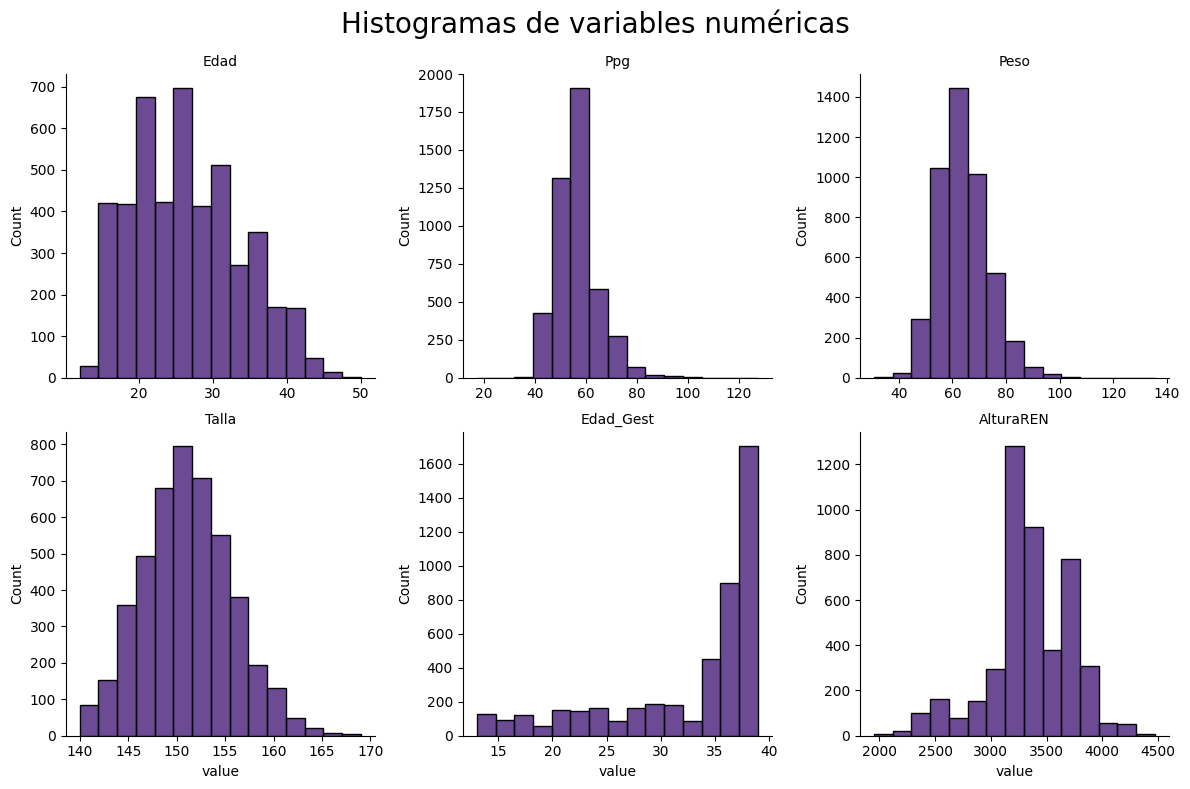

In [ ]:
g = sns.FacetGrid(df_num, col="variable", col_wrap=3, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.histplot, x="value", bins=15, color="#3B0F70")  # tono de la paleta magma
g.fig.subplots_adjust(top=0.9)
g.set_titles("{col_name}")
g.fig.suptitle("Histogramas de variables numéricas", fontsize=20)
plt.show()

La figura presenta la distribución de las variables numéricas incluidas en el modelo de clasificación nutricional. A partir de los histogramas, se pueden identificar patrones, asimetrías y rangos típicos para cada variable:

- **Edad**: La mayoría de las gestantes se encuentra en el rango de 18 a 30 años, lo que refleja una distribución levemente sesgada a la derecha, consistente con la edad reproductiva predominante en la región.

- **Ppg (peso pregestacional)**: Presenta una distribución centrada entre 55 y 70 kg, con pocos valores extremos hacia los lados. Esto sugiere una población con un peso inicial relativamente homogéneo, aunque se deben considerar los valores faltantes tratados previamente.

- **Peso actual**: Se concentra entre 60 y 80 kg, reflejando la ganancia de peso esperada durante el embarazo. La forma de la distribución es similar a la del Ppg, aunque desplazada hacia la derecha.

- **Talla**: Muestra una distribución normal simétrica, con la mayoría de gestantes midiendo entre 145 y 160 cm. Esta variable es clave para calcular el IMC y evaluar riesgos nutricionales.

- **Edad gestacional**: Presenta una distribución bimodal o multimodal, con un aumento de frecuencia hacia las últimas semanas del embarazo (30 a 39 semanas), lo cual es esperable ya que muchas gestantes se controlan más en el tercer trimestre.

- **AlturaREN**: La altitud de residencia varía ampliamente, con una concentración entre los 2500 y 3500 metros sobre el nivel del mar. Esta variable geográfica es importante para interpretar indicadores clínicos como la hemoglobina.


/tmp/ipython-input-20-3095126867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


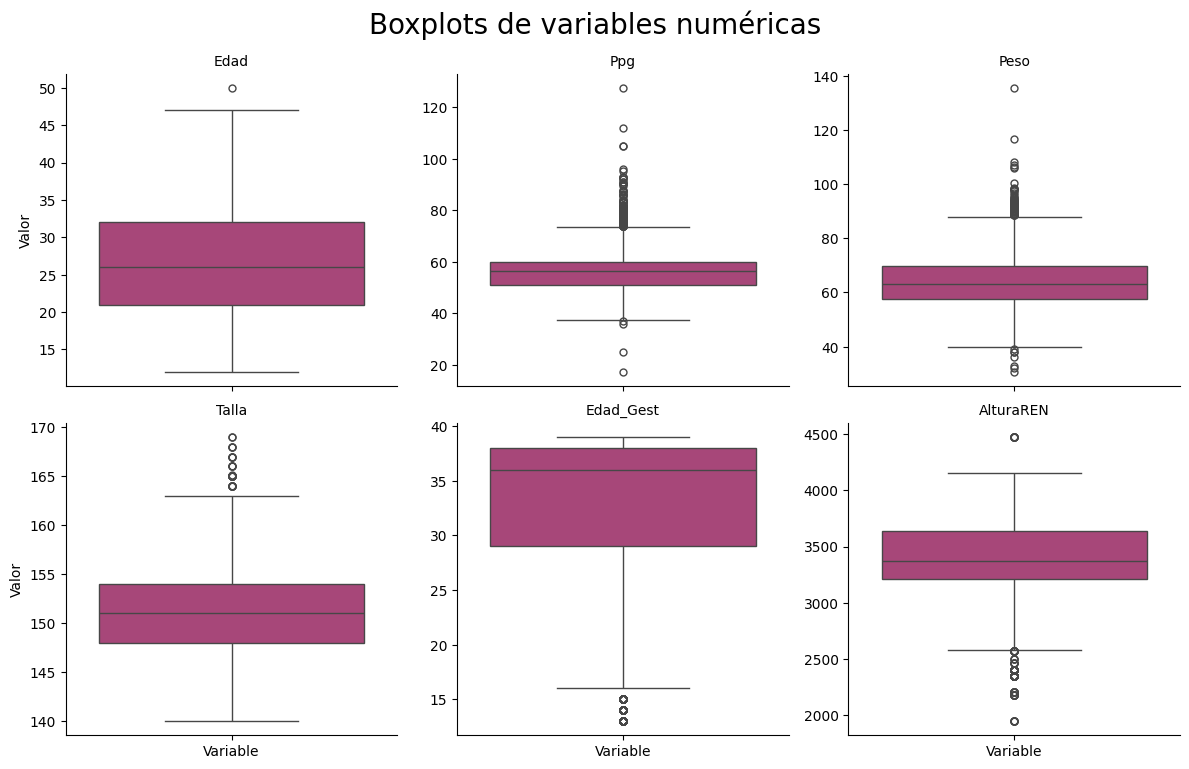

In [ ]:
# Boxplots en formato largo
df_num["x"] = "Variable"
g = sns.catplot(
    data=df_num, x="x", y="value",
    kind="box", col="variable", col_wrap=3,
    sharey=False, height=4, palette="magma"
)

g.set_titles("{col_name}")
g.set_axis_labels("", "Valor")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Boxplots de variables numéricas", fontsize=20)
plt.show()

Los boxplots permiten observar la dispersión, simetría y presencia de valores atípicos (outliers) en cada una de las variables numéricas consideradas en el modelo. A continuación, se interpretan los resultados obtenidos:

- **Edad**: La mediana se ubica alrededor de los 25 años. Se observan pocos valores atípicos por encima de los 45 años, lo cual es esperable dada la edad fértil típica.

- **Ppg (peso pregestacional)**: Aunque la mayoría de los valores se concentra entre 50 y 65 kg, se identifica una cantidad considerable de valores atípicos tanto hacia valores bajos como altos, lo que sugiere una mayor variabilidad en el peso antes del embarazo.

- **Peso actual**: Presenta una distribución similar al Ppg, con un rango intercuartílico ligeramente superior. También se identifican numerosos outliers por encima de los 90 kg, lo cual podría corresponder a casos de sobrepeso u obesidad.

- **Talla**: La estatura muestra una distribución más compacta, con la mayoría de gestantes entre 145 y 160 cm. Se detectan algunos outliers hacia valores altos (>165 cm), aunque no representan un problema significativo.

- **Edad gestacional (Edad_Gest)**: Los valores están bastante concentrados entre las 35 y 39 semanas, como se esperaba. No obstante, se detectan algunos valores atípicos hacia semanas tempranas (<20), lo cual puede reflejar controles prenatales iniciados en etapas tempranas.

- **AlturaREN**: Esta variable geográfica presenta una distribución más dispersa, con valores que oscilan entre los 2000 y más de 4000 msnm. Se identifican algunos outliers por encima de los 4500 msnm, los cuales podrían corresponder a localidades altoandinas específicas.

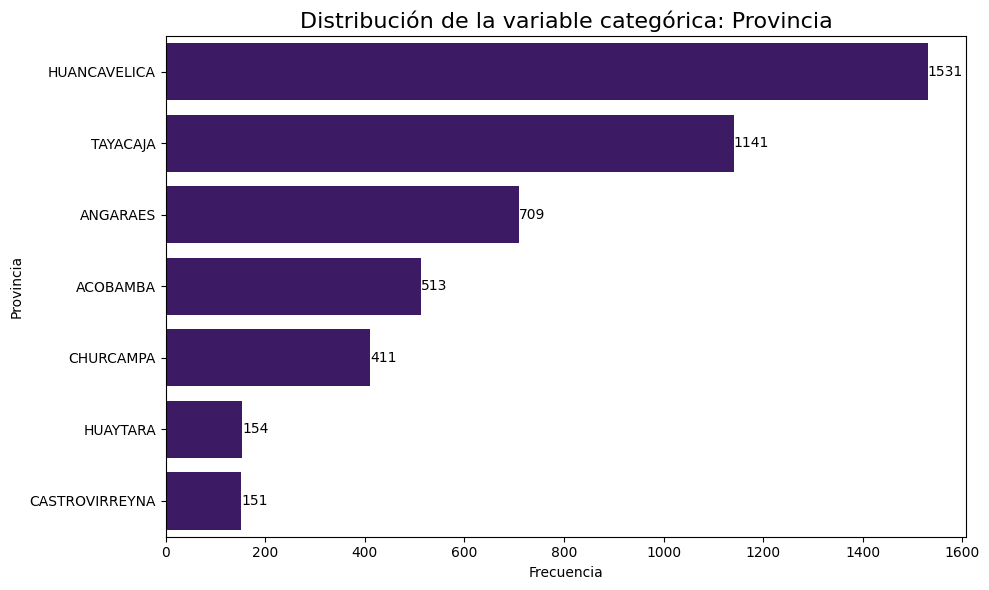

In [ ]:
plt.figure(figsize=(10, 6))
orden = df['Provincia'].value_counts().index  # Ordenar por frecuencia
ax = sns.countplot(data=df, y='Provincia', order=orden, color="#3B0F70")
# Agregar etiquetas a las barras
for p in ax.patches:
    frecuencia = int(p.get_width())
    ax.text(p.get_width() ,  # desplazamiento a la derecha
            p.get_y() + p.get_height() / 2,
            frecuencia,
            va='center')
plt.title("Distribución de la variable categórica: Provincia", fontsize=16)
plt.xlabel("Frecuencia")
plt.ylabel("Provincia")
plt.tight_layout()
plt.show()

El gráfico de barras muestra la frecuencia de registros según la provincia de origen de las gestantes en el departamento de Huancavelica. Esta variable categórica representa la procedencia geográfica de cada paciente, lo cual puede influir en su acceso a servicios de salud, nivel socioeconómico, condiciones ambientales y, por tanto, en su estado nutricional.

Se observan las siguientes características:

- **Huancavelica** es la provincia con mayor cantidad de registros (1531), seguida por **Tayacaja** (1141) y **Angaraes** (709). Esto podría deberse a una mayor población o mejor cobertura de datos en estas zonas.
  
- Provincias como **Acobamba** y **Churcampa** tienen una representación intermedia (513 y 411 registros respectivamente).

- Por otro lado, **Huaytará** (154) y **Castrovirreyna** (151) muestran una baja representación en el conjunto de datos, lo cual podría deberse a menor número de establecimientos de salud reportantes, menor población o subregistro.

Esta distribución desigual sugiere que el modelo debe considerar posibles sesgos geográficos. Además, podría ser recomendable aplicar técnicas de balanceo si la variable `Provincia` se emplea como predictor para evitar que el modelo favorezca las provincias más representadas.

## 1.6 Análisis Multivariado

/tmp/ipython-input-22-1876397765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df_num, x='Dx_CLAP', y="value", col="variable", kind="box",


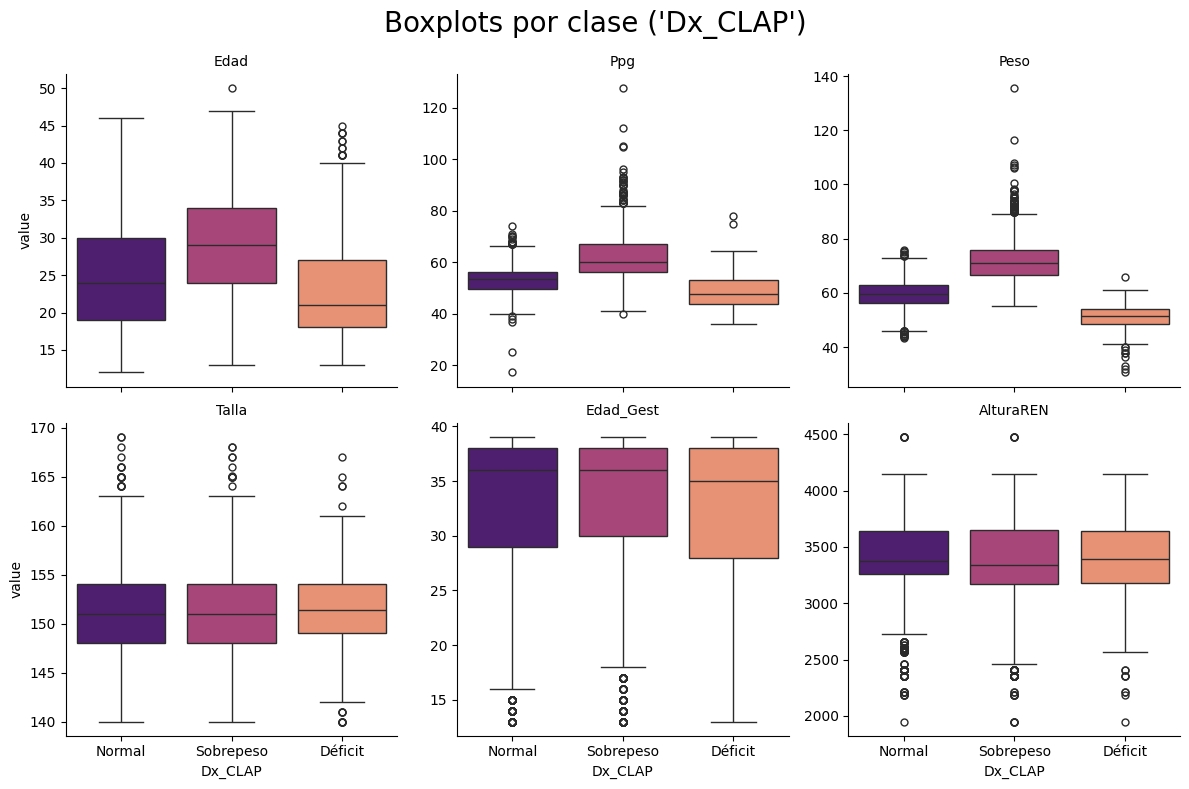

In [ ]:
# Boxplots por clase
g = sns.catplot(data=df_num, x='Dx_CLAP', y="value", col="variable", kind="box",
                col_wrap=3, sharey=False, height=4, palette="magma")
g.fig.subplots_adjust(top=0.9)
g.set_titles("{col_name}")
g.fig.suptitle("Boxplots por clase ('Dx_CLAP')", fontsize=20)
plt.show()


- **Edad**: Las gestantes con diagnóstico de *sobrepeso* tienden a ser ligeramente mayores que las de las otras clases, lo cual es coherente con el hecho de que la edad puede influir en el metabolismo y la ganancia de peso.

- **Ppg (peso pregestacional)** y **Peso actual**: Se observa una clara tendencia ascendente en los valores desde el grupo *Déficit* hasta *Sobrepeso*. Esto confirma la importancia de estas variables para discriminar entre estados nutricionales, dado que el peso es un indicador directo de la clasificación nutricional.

- **Talla**: Las diferencias entre grupos son menos pronunciadas, aunque se aprecia una leve disminución de la estatura media en el grupo *Déficit*. Si bien la talla es menos variable, puede influir al momento de calcular el IMC.

- **Edad gestacional (Edad_Gest)**: La distribución es similar entre grupos, aunque las gestantes con diagnóstico *Normal* tienden a estar en etapas más avanzadas del embarazo. Esto sugiere que el tiempo de gestación por sí solo no discrimina fuertemente entre clases.

- **AlturaREN**: No se observan diferencias notorias entre las categorías nutricionales en cuanto a la altitud del distrito de atención. Esto indica que la variable geográfica podría no tener un impacto directo en el diagnóstico nutricional, aunque sí podría influir en otras variables clínicas (como la hemoglobina).


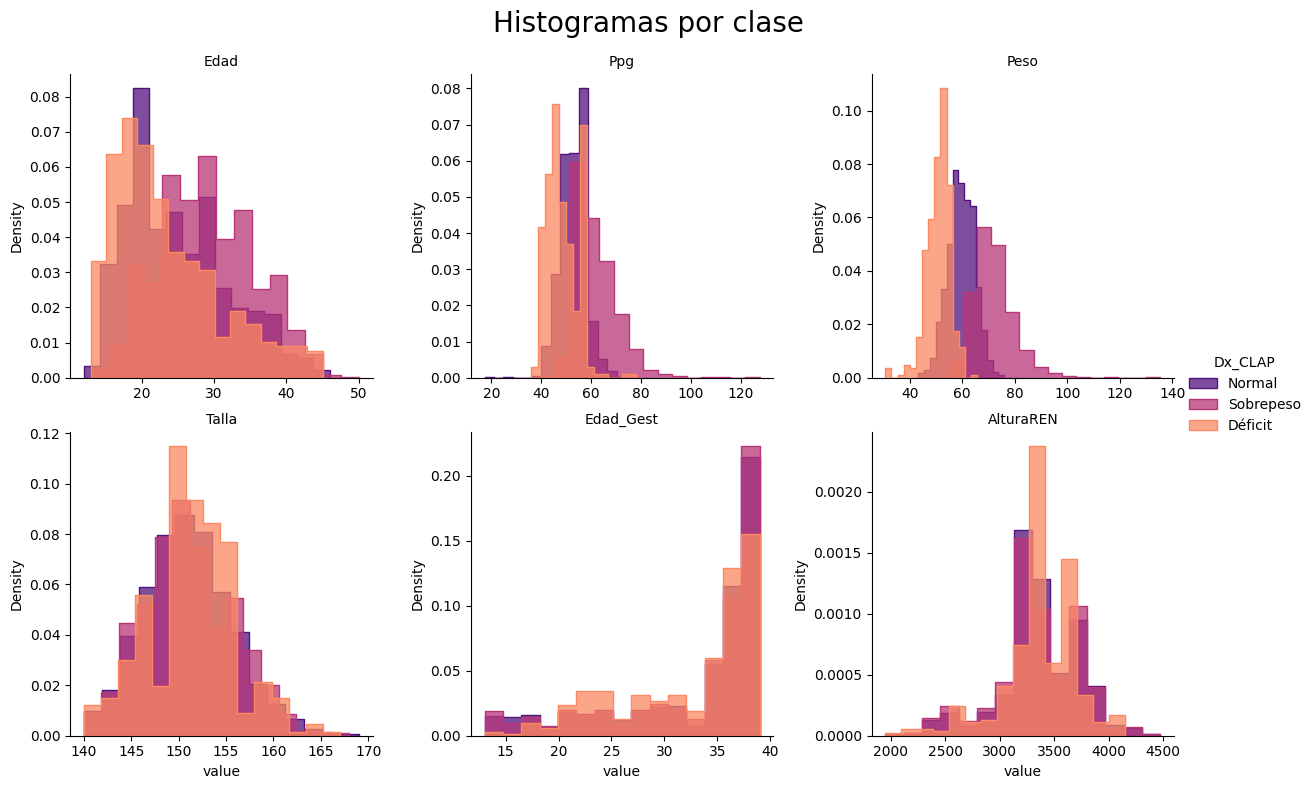

In [ ]:
# Histogramas por clase (superpuestos)
g = sns.FacetGrid(df_num, col="variable", col_wrap=3, height=4, sharex=False, sharey=False, hue='Dx_CLAP', palette="magma")
g.map_dataframe(sns.histplot, x="value", bins=15, element="step", stat="density", common_norm=False, multiple="dodge")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.set_titles("{col_name}")
g.fig.suptitle("Histogramas por clase", fontsize=20)
plt.show()

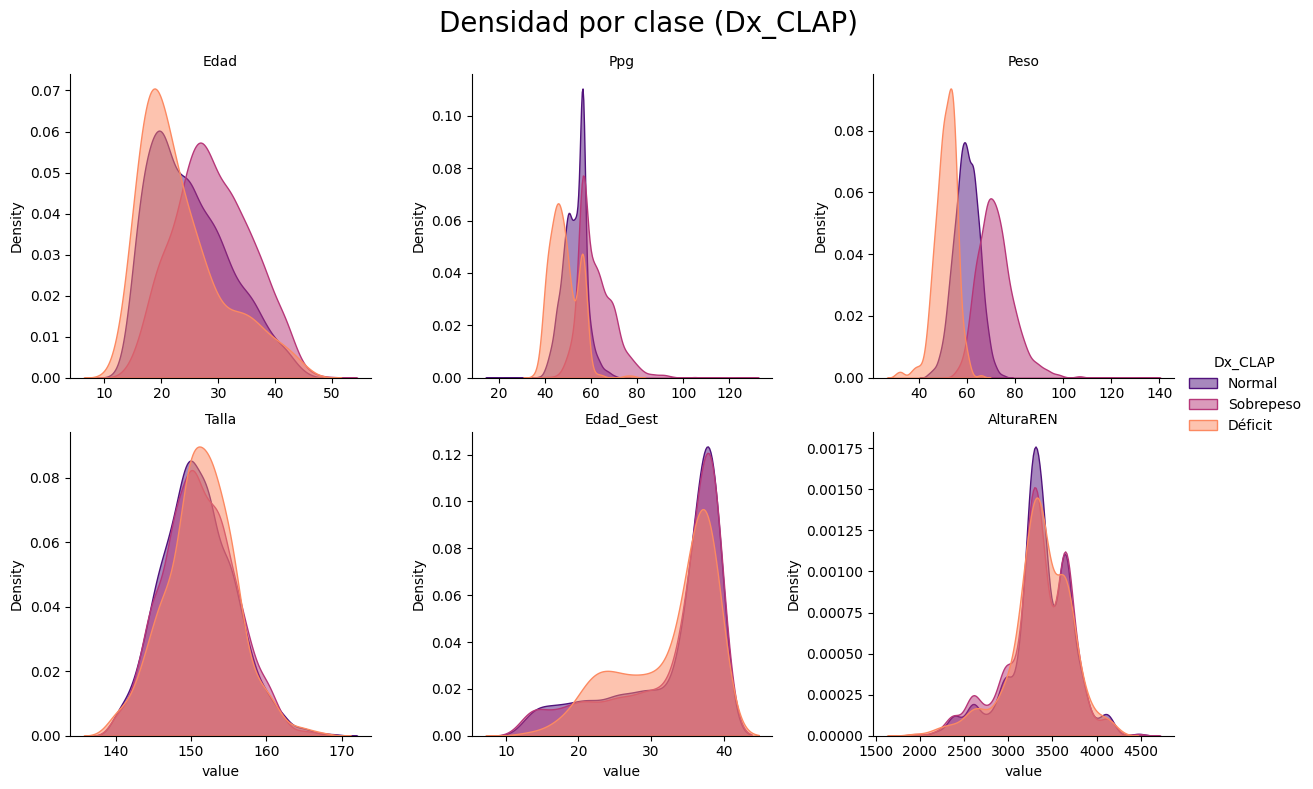

In [ ]:
# Densidades por clase
g = sns.FacetGrid(df_num, col="variable", col_wrap=3, height=4, sharex=False, sharey=False, hue='Dx_CLAP', palette="magma")
g.map_dataframe(sns.kdeplot, x="value", fill=True, alpha=0.5)
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.set_titles("{col_name}")
g.fig.suptitle("Densidad por clase (Dx_CLAP)", fontsize=20)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

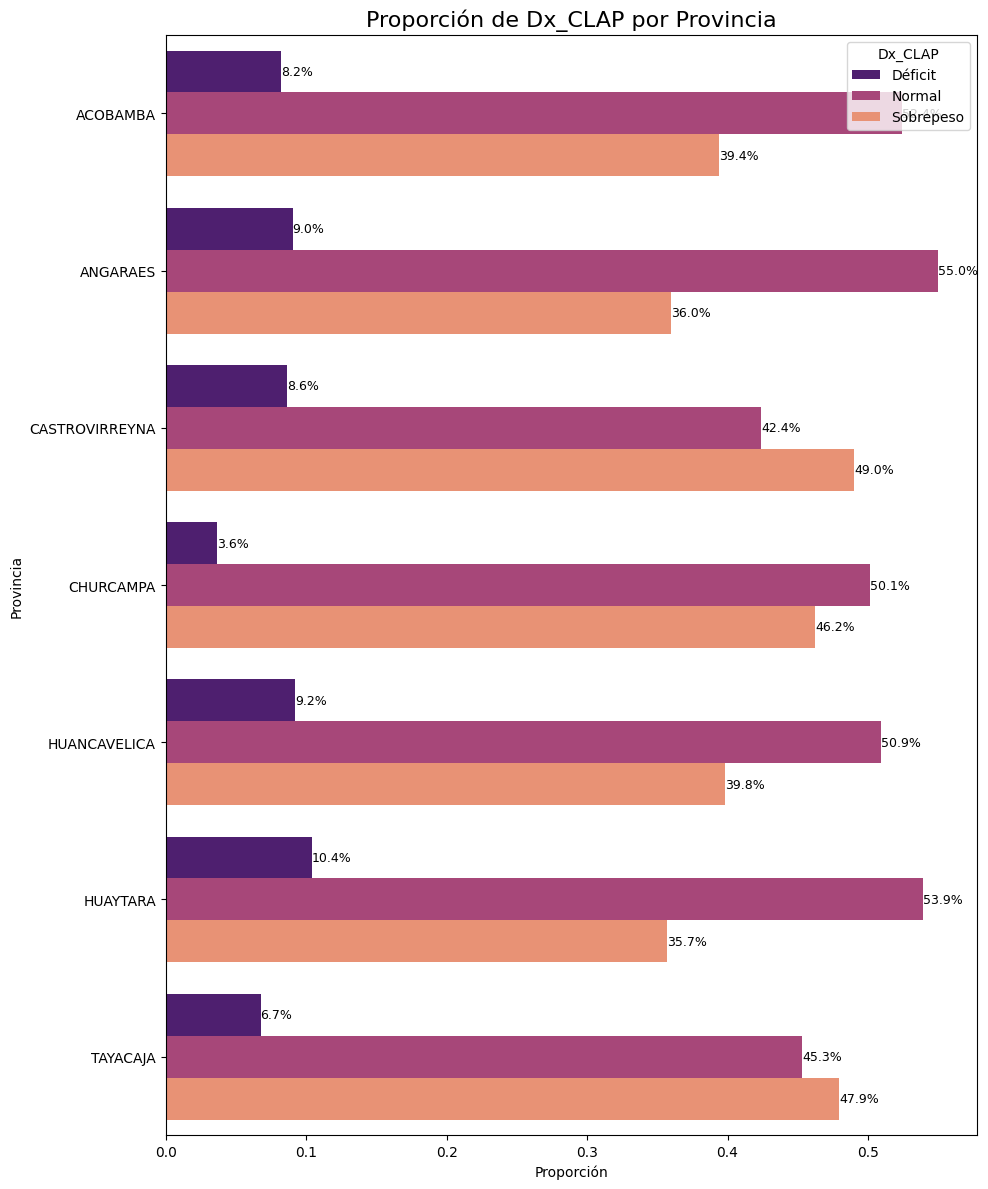

In [ ]:
# Crear tabla de proporciones
# Crear tabla de proporciones
df_prop = (
    df.groupby(['Provincia', 'Dx_CLAP']).size()
    .groupby(level=0).transform(lambda x: x / x.sum())
    .reset_index(name='Proporcion')
)

df_prop['Porcentaje'] = df_prop['Proporcion'] * 100

plt.figure(figsize=(10, 12))
barplot = sns.barplot(
    data=df_prop,
    y='Provincia',
    x='Proporcion',
    hue='Dx_CLAP',
    palette='magma'
)

for p in barplot.patches:
    width = p.get_width()
    if width > 0.01:
        x_pos = p.get_x() + p.get_width()
        y_pos = p.get_y() + p.get_height() / 2
        barplot.annotate(f'{width*100:.1f}%',
                         (x_pos , y_pos),
                         ha='left', va='center', fontsize=9, color='black')

plt.title('Proporción de Dx_CLAP por Provincia', fontsize=16)
plt.xlabel('Proporción')
plt.ylabel('Provincia')
plt.legend(title='Dx_CLAP', loc='upper right')
plt.tight_layout()
plt.show()



## 1.7 Análisis del target

La variable objetivo de este estudio es `Dx_CLAP`, que representa el diagnóstico nutricional de la gestante según los criterios del Centro Latinoamericano de Perinatología (CLAP). Esta variable es categórica y multiclase, y sus valores posibles reflejan el estado nutricional de cada paciente.

In [ ]:
df['Dx_CLAP'] = df['Dx_CLAP'].astype('category')

In [ ]:
print("\nDistribución de la variable objetivo (Dx_CLAP):")
print(df['Dx_CLAP'].value_counts())

print("\nProporción de clases:")
print(df['Dx_CLAP'].value_counts(normalize=True))



Distribución de la variable objetivo (Dx_CLAP):
Dx_CLAP
Normal       2309
Sobrepeso    1933
Déficit       368
Name: count, dtype: int64

Proporción de clases:
Dx_CLAP
Normal       0.500868
Sobrepeso    0.419306
Déficit      0.079826
Name: proportion, dtype: float64


/tmp/ipython-input-29-2154027002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Dx_CLAP', palette='magma')


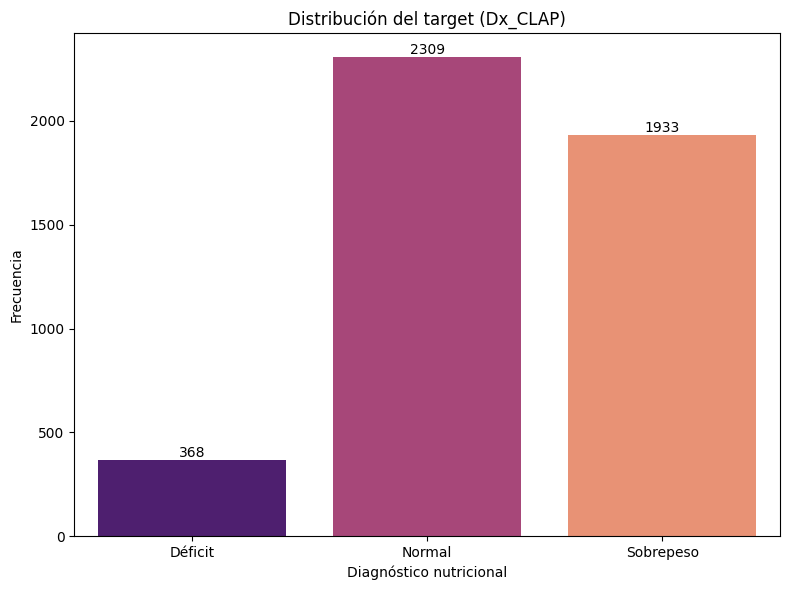

In [ ]:
# Visualización de la variable objetivo
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Dx_CLAP', palette='magma')

plt.title('Distribución del target (Dx_CLAP)')
plt.xlabel("Diagnóstico nutricional")
plt.ylabel("Frecuencia")

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height ),
                ha='center', va='bottom', fontsize=10)

ax.set_xticks(range(len(df['Dx_CLAP'].cat.categories)))
ax.set_xticklabels(df['Dx_CLAP'].cat.categories)

plt.tight_layout()
plt.show()

La variable objetivo `Dx_CLAP` representa el diagnóstico nutricional de la gestante y constituye el foco principal del modelo de clasificación. Esta variable es de tipo categórica multiclase y está compuesta por tres categorías principales:

- **Normal**: 2309 gestantes
- **Sobrepeso**: 1933 gestantes
- **Déficit**: 368 gestantes

Esta **desproporción entre clases** implica un **problema de clasificación desbalanceada**, donde el modelo podría aprender a favorecer las clases mayoritarias, disminuyendo la capacidad de identificar correctamente los casos de *Déficit*.

## 1.8. Visualización de relaciones entre variables

La variable `AlturaREN` representa la altitud del distrito (en metros sobre el nivel del mar) en el que fue atendida cada gestante. En regiones andinas como Huancavelica, esta característica geográfica puede variar considerablemente entre provincias e incluso dentro de una misma provincia, lo cual tiene implicancias importantes en la interpretación de indicadores clínicos y en la clasificación nutricional.

In [ ]:
# Estadísticas de AlturaREN por Departamento
stats_altura = df.groupby("Provincia")["AlturaREN"].agg(['mean', 'std', 'min', 'max'])
display(stats_altura)

,mean,std,min,max
Provincia,,,,
ACOBAMBA,3591.771930,196.158559,2404,4473
ANGARAES,3386.873061,247.168629,2771,4150
CASTROVIRREYNA,3366.960265,603.699052,2184,4473
CHURCAMPA,3128.985401,401.530426,2212,3806
HUANCAVELICA,3480.442848,223.574157,2658,4473
HUAYTARA,3322.220779,641.396916,1950,4092
TAYACAJA,3109.040316,339.156092,2350,3840


La variable `AlturaREN`, que representa la altitud (en metros sobre el nivel del mar) del distrito donde fue atendida cada gestante, muestra una **alta variabilidad en todo el departamento de Huancavelica**. Según las estadísticas generales, los valores de altitud oscilan entre aproximadamente **1950 msnm y 4473 msnm**, con medias provinciales entre 3100 y 3600 msnm y desviaciones estándar que en algunos casos superan los 600 metros.

Esta variabilidad es relevante porque la altitud puede influir directamente en **parámetros fisiológicos** de las gestantes, como los niveles de oxigenación y hemoglobina, así como en **condiciones ambientales** (acceso a alimentos, temperatura, ruralidad) que afectan la nutrición materna.

Por tanto, la presencia de esta diversidad geográfica justifica la inclusión de `AlturaREN` como una variable predictora en el modelo, ya que permite capturar posibles efectos contextuales que no se explican exclusivamente por variables clínicas o sociodemográficas.


/tmp/ipython-input-31-1891322097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Provincia", y="AlturaREN", palette="magma")


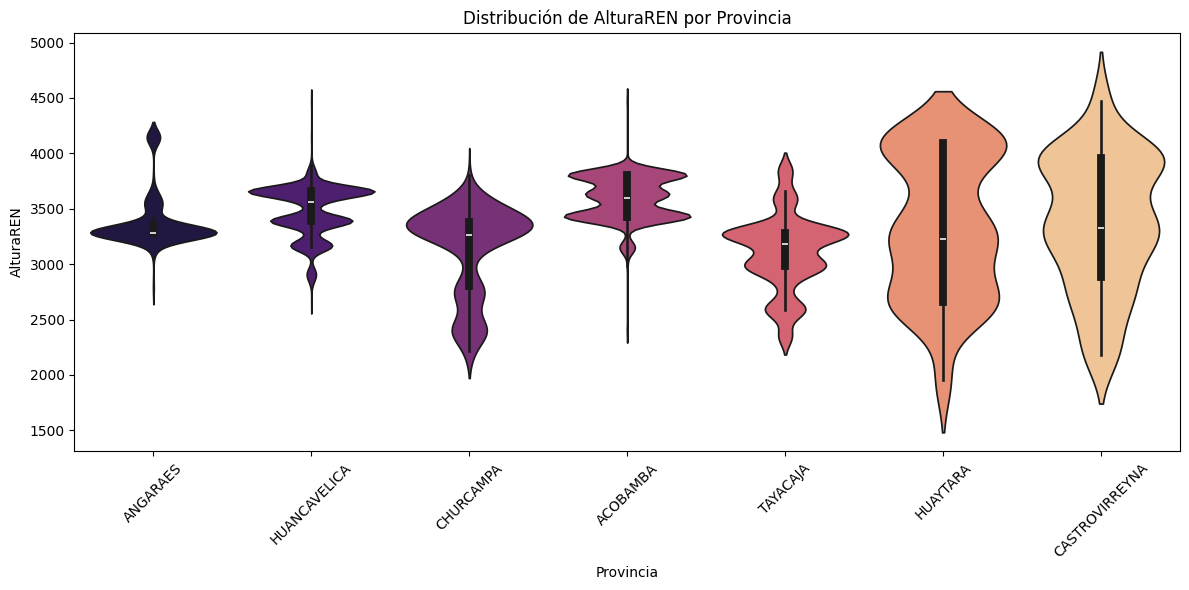

In [ ]:
# Diagrama de violín para ver distribución de alturas por Provincia
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Provincia", y="AlturaREN", palette="magma")
plt.xticks(rotation=45)
plt.title("Distribución de AlturaREN por Provincia")
plt.tight_layout()
plt.show()

El gráfico tipo violín muestra la distribución de la altitud (`AlturaREN`) por provincia del departamento de Huancavelica, y permite observar la variabilidad interna en cada jurisdicción.

**Observaciones clave:**

- Se aprecia una **gran heterogeneidad altitudinal** tanto entre provincias como dentro de ellas. Algunas provincias, como **Huaytará** y **Castrovirreyna**, presentan distribuciones más amplias, lo cual indica que dentro de una misma provincia hay localidades con altitudes significativamente diferentes (desde zonas por debajo de 2500 msnm hasta zonas cercanas a 4500 msnm).

- Otras provincias, como **Tayacaja** o **Angaraes**, tienen distribuciones más concentradas, reflejando menor dispersión altitudinal en los distritos donde se realizaron los registros.

- La **mediana** de altitud en la mayoría de provincias se ubica por encima de los 3000 msnm, lo cual confirma el contexto geográfico altoandino general de la región.

**Conclusión:**

Este gráfico confirma que la altitud varía considerablemente tanto entre como dentro de las provincias, lo cual refuerza su relevancia como variable predictora en el modelo. La altitud puede actuar como un proxy geográfico que captura efectos ambientales, fisiológicos y socioeconómicos que influyen indirectamente en el estado nutricional de las gestantes.

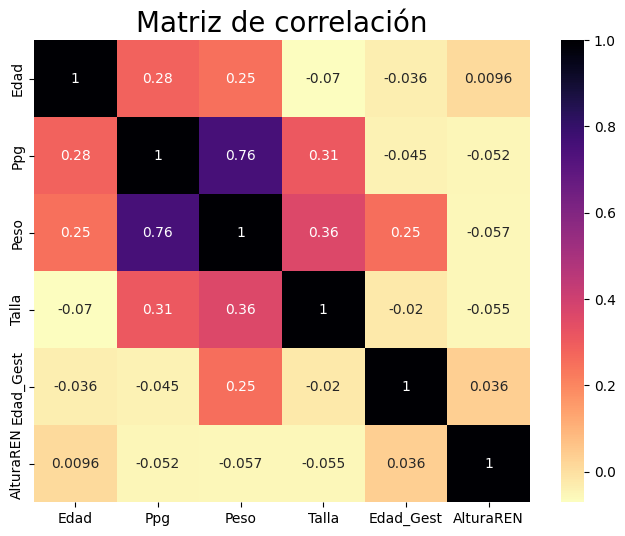

In [ ]:
# Correlación entre variables numéricas
plt.figure(figsize=(8,6))
sns.heatmap(df[variables_cuantitativas].corr(), annot=True, cmap='magma_r')
plt.title("Matriz de correlación", fontsize=20)
plt.show()

Existe una **fuerte correlación positiva** entre `Ppg` (peso pregestacional) y `Peso actual` (**0.76**), lo cual es esperable, ya que el peso de la gestante durante el embarazo suele estar fuertemente influenciado por su peso inicial.

- Se observa una **correlación moderada** entre:
  - `Peso` y `Talla` (**0.36**)
  - `Ppg` y `Talla` (**0.31**)
  - `Peso` y `Edad Gestacional` (**0.25**)
  - `Edad` y `Ppg` (**0.28**)

- Las demás correlaciones son **bajas o cercanas a cero**, especialmente las que involucran a `AlturaREN`, lo que indica que esta variable aporta información distinta a la del resto de variables clínicas.

## 1.9 Muestreo Estratificado

Dado que el presente análisis utiliza datos provenientes de múltiples provincias del departamento de Huancavelica, es importante considerar la distribución desigual de los registros entre ellas. Como se evidenció en el análisis exploratorio, provincias como **Huancavelica** y **Tayacaja** concentran una gran proporción de gestantes, mientras que otras como **Huaytará** o **Castrovirreyna** están subrepresentadas.

Esta disparidad podría influir negativamente en el proceso de entrenamiento del modelo, haciendo que las provincias más frecuentes dominen el aprendizaje y se generen sesgos geográficos.

Para evitar este problema y asegurar una representación justa de todas las provincias, se aplicó un **muestreo estratificado**, utilizando la variable `Provincia` como estrato. Este procedimiento permite dividir el conjunto de datos en subconjuntos proporcionales según la provincia de origen, asegurando que cada grupo esté adecuadamente representado tanto en el conjunto de entrenamiento como en el de prueba.

De esta manera, se garantiza que el modelo no aprenda patrones específicos de las provincias con mayor número de observaciones, favoreciendo así una clasificación más generalizable y equitativa.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Tamaño de la muestra deseado (por ejemplo, 20% del total original)
tamanio_muestra = 0.20

In [ ]:
# Realizar muestreo estratificado sobre el Provincia
df_muestra, _ = train_test_split(
    df,
    test_size=(1 - tamanio_muestra),
    stratify=df['Provincia'],
    random_state=42
)

# Verificación de la muestra
print("Tamaño total original:", df.shape[0])
print("Tamaño de la muestra estratificada:", df_muestra.shape[0])
print("\nFrecuencia relativa por Provincia (original vs muestra):")
comparacion = pd.DataFrame({
    "Original": df['Provincia'].value_counts(normalize=True).sort_index(),
    "Muestra": df_muestra['Provincia'].value_counts(normalize=True).sort_index()
})
display(comparacion)

Tamaño total original: 4610
Tamaño de la muestra estratificada: 922

Frecuencia relativa por Provincia (original vs muestra):


,Original,Muestra
Provincia,,
ACOBAMBA,0.111280,0.111714
ANGARAES,0.153796,0.154013
CASTROVIRREYNA,0.032755,0.032538
CHURCAMPA,0.089154,0.088937
HUANCAVELICA,0.332104,0.331887
HUAYTARA,0.033406,0.033623
TAYACAJA,0.247505,0.247289


/tmp/ipython-input-38-3981416888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_muestra, x='Dx_CLAP', palette='magma')


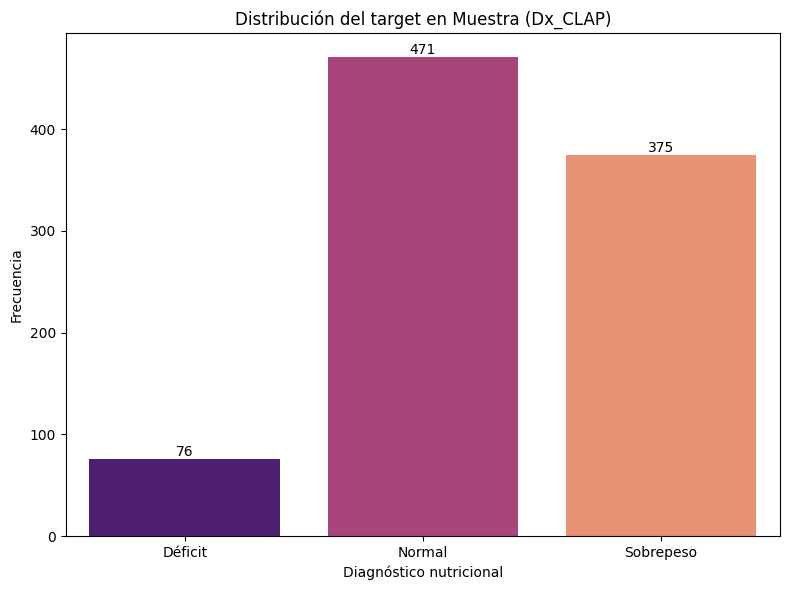

In [ ]:
# Visualización de la variable objetivo
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_muestra, x='Dx_CLAP', palette='magma')

plt.title('Distribución del target en Muestra (Dx_CLAP)')
plt.xlabel("Diagnóstico nutricional")
plt.ylabel("Frecuencia")

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

ax.set_xticks(range(len(df['Dx_CLAP'].cat.categories)))
ax.set_xticklabels(df['Dx_CLAP'].cat.categories)

plt.tight_layout()
plt.show()

## 1.10 Balanceo del Target

Como se identificó anteriormente, la variable objetivo `Dx_CLAP` presenta un claro desbalance de clases, donde las categorías *Normal* y *Sobrepeso* están sobrerrepresentadas frente a la clase *Déficit*, que tiene una proporción mucho menor.

Para abordar este problema, se implementó la técnica **SMOTE (Synthetic Minority Oversampling Technique)**,

El gráfico a continuación muestra la nueva distribución del target posterior al balanceo mediante SMOTE:

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

# Codificar el target
le = LabelEncoder()
y = le.fit_transform(df_muestra['Dx_CLAP'])

# Variables predictoras (excluyendo el target)
X = df_muestra.drop(columns=['Dx_CLAP'])

# Aplicar sobremuestreo
ros = RandomOverSampler(random_state=42)
X_bal, y_bal = ros.fit_resample(X, y)

In [ ]:
# Reconstruir DataFrame balanceado
# Convertimos el target a etiquetas originales
y_bal_labels = le.inverse_transform(y_bal)

# Creamos el nuevo DataFrame balanceado
df_bal = X_bal.copy()
df_bal['Dx_CLAP'] = y_bal_labels


/tmp/ipython-input-41-2013199017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_bal, x='Dx_CLAP', palette='magma')


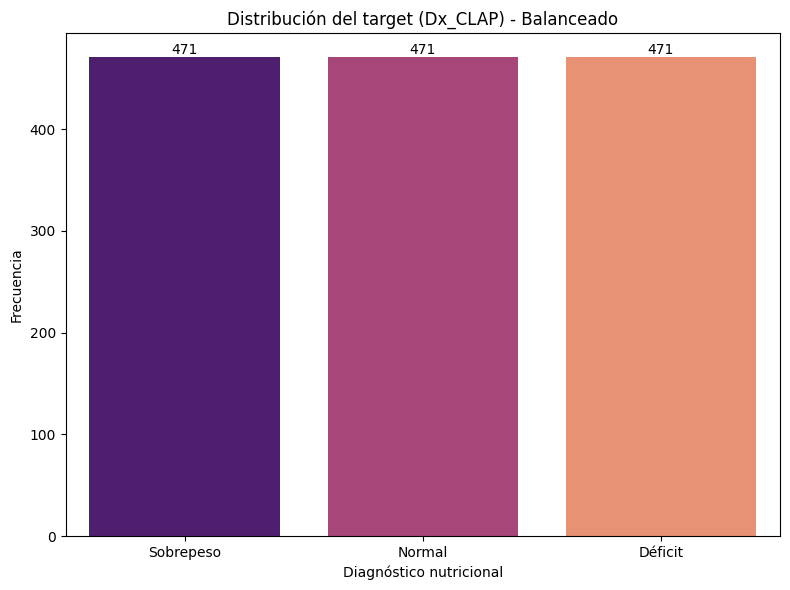

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_bal, x='Dx_CLAP', palette='magma')
plt.title('Distribución del target (Dx_CLAP) - Balanceado')
plt.xlabel("Diagnóstico nutricional")
plt.ylabel("Frecuencia")

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Modelado y Evaluación

Partición en conjunto de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Definir las variables de entrada
variables_cuantitativas = ['Edad', 'Ppg', 'Peso', 'Talla', 'Edad_Gest', 'AlturaREN']
variables_cualitativas = ['Provincia']

# Separar variables predictoras y target
X = df_bal[variables_cuantitativas + variables_cualitativas]
y = df_bal['Dx_CLAP']


In [ ]:
print(df_bal.columns.tolist())

['Provincia', 'Edad', 'Ppg', 'Peso', 'Talla', 'Edad_Gest', 'AlturaREN', 'Dx_CLAP']


Antes de entrenar el modelo, se realizó una partición del dataset balanceado en conjuntos de entrenamiento y prueba. Como parte de esta preparación, se aplicó la técnica de **One-Hot Encoding** a la variable categórica `Provincia`.

Esta transformación convierte cada categoría en una serie de variables binarias (0 o 1), lo cual es necesario porque las redes neuronales no pueden interpretar directamente variables categóricas en formato de texto o como enteros codificados, ya que podrían asumir una relación ordinal entre categorías que no existe.


Esta codificación es especialmente importante en modelos como el **MLPClassifier**, que requiere entradas numéricas y trabaja bajo operaciones matriciales. Además, ayuda a prevenir sesgos artificiales en el modelo y mejora la estabilidad del entrenamiento.

In [ ]:
#One-hot encoding para variables categóricas (Departamento)
X = pd.get_dummies(X, columns=variables_cualitativas, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# Verificar dimensiones
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (1130, 12)
Tamaño del conjunto de prueba: (283, 12)


## 2.2 RNN con MLPClassifier

se implementó un modelo de clasificación supervisada utilizando una **Red Neuronal Multicapa (MLP)** a través del estimador `MLPClassifier` de la biblioteca `scikit-learn`.


Este tipo de red es apropiado para tareas de clasificación multiclase como la predicción del diagnóstico nutricional (`Dx_CLAP`), ya que permite capturar relaciones no lineales entre las variables predictoras (como edad, peso, talla, provincia, altitud, etc.) y la variable objetivo.

La implementación del modelo incluyó:

- Configuración de la arquitectura (número de capas ocultas y neuronas).
- Definición de la función de activación y del algoritmo de optimización.
- Entrenamiento del modelo con el conjunto balanceado (`df_bal`).
- Evaluación de su rendimiento sobre el conjunto de prueba.

A continuación, se detallan los parámetros utilizados, el proceso de entrenamiento y los resultados obtenidos con el modelo `MLPClassifier`.

### Ajuste de hiperparametos

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Definir grilla de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(32, 32), (64, 64)],  # capas y neuronas
    'activation': ['relu', 'tanh'],  # función de activación
    'solver': ['adam'],  # optimizador (adam permite mini-batch)
    'alpha': [0.0001, 0.001],  # regularización L2
    'learning_rate': ['constant', 'adaptive'],  # tasa de aprendizaje
    'max_iter': [100,200]  # aproximación a “épocas”
}

Para optimizar el rendimiento del modelo `MLPClassifier`, se definió una grilla de búsqueda con distintos valores para los hiperparámetros más relevantes. A continuación, se detalla el significado de cada uno:

- **`hidden_layer_sizes`**: Especifica la cantidad de capas ocultas y el número de neuronas en cada una. Por ejemplo:
  - `(32, 32)` representa dos capas ocultas con 32 neuronas cada una.
  - `(64, 64)` representa dos capas ocultas con 64 neuronas cada una.
  A mayor cantidad de neuronas y capas, mayor capacidad del modelo para aprender relaciones complejas, aunque con mayor riesgo de sobreajuste.

- **`activation`**: Define la función de activación utilizada en las neuronas de las capas ocultas. Se evaluaron:
  - `'relu'` (Rectified Linear Unit): común por su eficiencia y buen rendimiento.
  - `'tanh'`: función hiperbólica que produce salidas entre -1 y 1, útil en algunos contextos donde se busca centrado.

- **`solver`**: Indica el algoritmo de optimización utilizado para el ajuste de pesos:
  - `'adam'`: un optimizador estocástico eficiente basado en descenso de gradiente con momentos adaptativos. Funciona bien con datos grandes o ruidosos.

- **`alpha`**: Coeficiente de regularización L2. Ayuda a prevenir el sobreajuste penalizando los pesos grandes. Valores pequeños (como 0.0001 o 0.001) permiten regularización suave.

- **`learning_rate`**: Controla cómo cambia la tasa de aprendizaje durante el entrenamiento:
  - `'constant'`: mantiene una tasa de aprendizaje fija durante todo el entrenamiento.
  - `'adaptive'`: reduce la tasa automáticamente si el modelo deja de mejorar, permitiendo una mejor convergencia.

- **`max_iter`**: Número máximo de iteraciones del optimizador (equivalente a las *épocas* en redes neuronales). Se evaluaron 100 y 200 para permitir al modelo entrenarse con distintas profundidades de ajuste.

Estos hiperparámetros fueron evaluados mediante validación cruzada para seleccionar la combinación que ofrezca el mejor equilibrio entre precisión y generalización.

In [ ]:
# Crear modelo base
mlp = MLPClassifier(random_state=42)

# Búsqueda con validación cruzada
grid_search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

grid_search_mlp.fit(X_train, y_train)

# Resultados en un DataFrame
results_mlp = pd.DataFrame(grid_search_mlp.cv_results_)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Seleccionar columnas importantes
summary_mlp = results_mlp[[
    'param_hidden_layer_sizes',
    'param_activation',
    'param_alpha',
    'param_learning_rate',
    'param_max_iter',
    'mean_test_score'
]].sort_values(by='mean_test_score', ascending=False)

# Renombrar columnas para presentación
summary_mlp.columns = [
    'Capas ocultas',
    'Función de activación',
    'Alpha',
    'Tasa de aprendizaje',
    'Épocas (max_iter)',
    'Precisión promedio'
]

# Mostrar resumen
print("Resultados del ajuste de hiperparámetros para MLPClassifier:")
display(summary_mlp)

Resultados del ajuste de hiperparámetros para MLPClassifier:


,Capas ocultas,Función de activación,Alpha,Tasa de aprendizaje,Épocas (max_iter),Precisión promedio
24,"(32, 32)",tanh,0.0010,constant,100,0.825641
26,"(32, 32)",tanh,0.0010,adaptive,100,0.825641
18,"(32, 32)",tanh,0.0001,adaptive,100,0.823020
16,"(32, 32)",tanh,0.0001,constant,100,0.823020
25,"(32, 32)",tanh,0.0010,constant,200,0.808842
27,"(32, 32)",tanh,0.0010,adaptive,200,0.808842
28,"(64, 64)",tanh,0.0010,constant,100,0.792088
30,"(64, 64)",tanh,0.0010,adaptive,100,0.792088
31,"(64, 64)",tanh,0.0010,adaptive,200,0.791201
29,"(64, 64)",tanh,0.0010,constant,200,0.791201


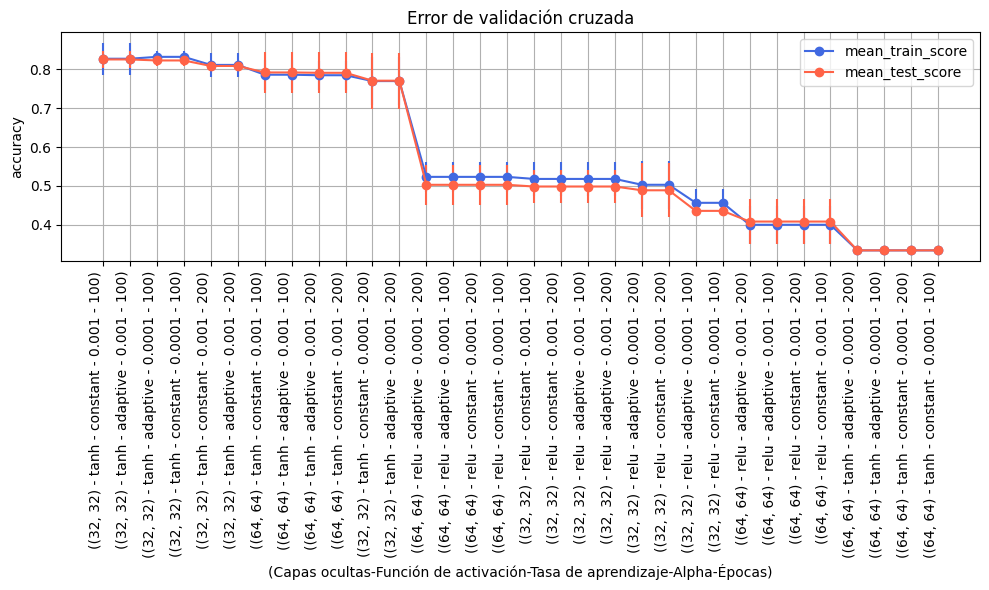

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results_mlp['config'] = (
    '(' + results_mlp['param_hidden_layer_sizes'].astype(str) +
    ' - ' + results_mlp['param_activation'].astype(str) +
    ' - ' + results_mlp['param_learning_rate'].astype(str) +
    ' - ' + results_mlp['param_alpha'].astype(str) +
    ' - ' + results_mlp['param_max_iter'].astype(str) + ')'
)
results_mlp = results_mlp.sort_values(by='mean_test_score', ascending=False).reset_index(drop=True)


# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar precisión promedio en entrenamiento
results_mlp.plot(
    x='config',
    y='mean_train_score',
    yerr='std_train_score',
    ax=ax,
    label='mean_train_score',
    fmt='-o',
    color='royalblue'
)

# Graficar precisión promedio en validación
results_mlp.plot(
    x='config',
    y='mean_test_score',
    yerr='std_test_score',
    ax=ax,
    label='mean_test_score',
    fmt='-o',
    color='tomato'
)

# Ajustes de estilo
ax.set_xticks(np.arange(len(results_mlp['config'])))
ax.set_xticklabels(results_mlp['config'], rotation=90, ha='right')
ax.set_ylabel('accuracy')
ax.set_xlabel('(Capas ocultas-Función de activación-Tasa de aprendizaje-Alpha-Épocas)')
ax.set_title('Error de validación cruzada')
ax.grid(True)
plt.tight_layout()
plt.show()


El gráfico muestra los resultados de la validación cruzada aplicada al modelo `MLPClassifier`, evaluando distintas combinaciones de hiperparámetros definidos en la grilla. Se comparan dos métricas principales:

- **`mean_train_score`** (línea azul): precisión promedio obtenida durante el entrenamiento.
- **`mean_test_score`** (línea roja): precisión promedio obtenida en los subconjuntos de prueba (validación cruzada).


In [ ]:
print("\nMejores hiperparámetros encontrados:")
print(grid_search_mlp.best_params_)
print("Mejor score de validación cruzada:", grid_search_mlp.best_score_)


Mejores hiperparámetros encontrados:
{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (32, 32), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}
Mejor score de validación cruzada: 0.8256414959459715


### Evaluación del modelo

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
grid_search_mlp

best_rnn = grid_search_mlp.best_estimator_
y_pred_rnn = best_rnn.predict(X_test)


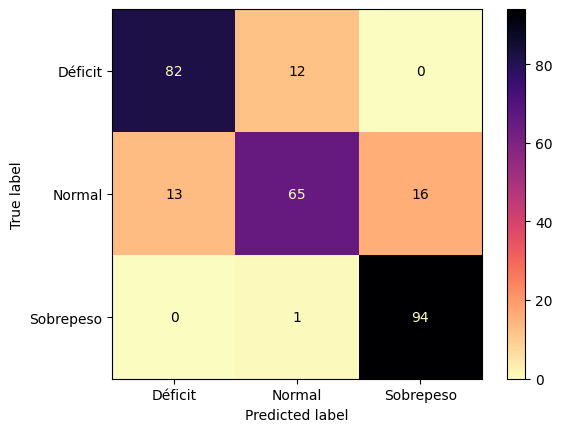

In [ ]:
# Mostrar matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_rnn, X_test, y_test, cmap='magma_r')

**Clase "Déficit"**:
  - 82 casos fueron correctamente clasificados.
  - 12 casos fueron erróneamente clasificados como *Normal*.
  - 0 clasificados como *Sobrepeso*.  
**Desempeño notablemente alto para una clase minoritaria, resultado del uso de SMOTE.**

**Clase "Normal"**:
  - 65 casos correctamente clasificados.
  - 13 mal clasificados como *Déficit*.
  - 16 mal clasificados como *Sobrepeso*.  
**El modelo tiene mayor dificultad para distinguir esta clase, probablemente por su cercanía en valores intermedios con las otras dos.**

**Clase "Sobrepeso"**:
  - 94 clasificaciones correctas.
  - Solo 1 mal clasificado como *Normal*.  
**Excelente desempeño para esta clase.**

In [ ]:
# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rnn))

Reporte de Clasificación:
              precision    recall  f1-score   support

     Déficit       0.86      0.87      0.87        94
      Normal       0.83      0.69      0.76        94
   Sobrepeso       0.85      0.99      0.92        95

    accuracy                           0.85       283
   macro avg       0.85      0.85      0.85       283
weighted avg       0.85      0.85      0.85       283



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas agregadas (ponderadas)
accuracy_rnn_1 = accuracy_score(y_test, y_pred_rnn)
precision_rnn_1 = precision_score(y_test, y_pred_rnn, average='weighted')
recall_rnn_1 = recall_score(y_test, y_pred_rnn, average='weighted')
f1_rnn_1 = f1_score(y_test, y_pred_rnn, average='weighted')

# Mostrar resultados
print(f" Accuracy: {accuracy_rnn_1:.4f}")
print(f" Precision (ponderada): {precision_rnn_1:.4f}")
print(f" Recall (ponderado): {recall_rnn_1:.4f}")
print(f" F1-score (ponderado): {f1_rnn_1:.4f}")

 Accuracy: 0.8516
 Precision (ponderada): 0.8504
 Recall (ponderado): 0.8516
 F1-score (ponderado): 0.8471


## 2.3 RNN con Keras

Con el objetivo de comparar resultados y evaluar diferentes enfoques, se construyó un segundo modelo de red neuronal utilizando la biblioteca **Keras**, basada en TensorFlow. A diferencia del `MLPClassifier` de `scikit-learn`, que proporciona una interfaz simplificada para redes multicapa, **Keras permite un mayor control sobre la arquitectura, el entrenamiento y la optimización** del modelo.

En este caso, se implementó una **red neuronal densa (feedforward)** compuesta por una capa de entrada, una o más capas ocultas densas con funciones de activación no lineales (`ReLU`), y una capa de salida con activación `softmax`, adecuada para tareas de clasificación multiclase como la predicción del diagnóstico nutricional (`Dx_CLAP`).

A continuación, se describe la arquitectura de la red, los hiperparámetros utilizados, y los resultados obtenidos en términos de precisión y generalización.

### Ajuste de hiperparametos

In [ ]:
!pip install keras-tuner --quiet


In [ ]:
import random
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


Antes de entrenar la red neuronal con Keras, es fundamental asegurar que los datos de entrada estén en el formato numérico y de tipo correcto. A diferencia de otros modelos más flexibles como el `MLPClassifier` de `scikit-learn`, las redes construidas con Keras requieren que tanto las variables predictoras (`X`) como las etiquetas (`y`) estén expresadas como **matrices NumPy con tipos de datos numéricos específicos**.

In [ ]:
# Asegurar tipos correctos
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Codificar y_train, y_test si son textos
if y_train.dtype == 'object' or y_test.dtype == 'object':
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)
else:
    le = None  # Ya estaban codificados

# Convertir tipo a int para clasificación multiclase
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

Para optimizar el rendimiento del modelo en Keras, se definió una función `build_model(hp)` que permite construir redes neuronales **ajustables dinámicamente**.

In [ ]:
def build_model(hp):
    model = Sequential()

    # Capas ocultas configurables
    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))

    # Capa de salida multiclase
    model.add(Dense(3, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.01])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


A continuación, se describen los principales hiperparámetros considerados:

- **`n_layers`**: Número de capas ocultas. Se definió como un valor entero entre 1 y 3. Este hiperparámetro controla la **profundidad de la red**, y permite evaluar arquitecturas más o menos complejas.

- **`units_i`**: Cantidad de neuronas por capa. Para cada capa oculta `i`, se permitió variar entre 16 y 128 neuronas, en incrementos de 16. Este hiperparámetro determina la **capacidad de aprendizaje** del modelo.

- **`activation`**: Función de activación utilizada en las capas ocultas. Se exploraron las funciones `'relu'` y `'tanh'`, que introducen no linealidades esenciales para que la red pueda aprender patrones complejos.

- **`learning_rate`**: Tasa de aprendizaje del optimizador. Se consideraron dos valores (`0.001` y `0.01`) para evaluar diferentes velocidades de ajuste de pesos durante el entrenamiento.

- **`optimizer`**: Se utilizó el optimizador `Adam`, conocido por su eficiencia y capacidad de adaptación en redes profundas.

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name='anemia_prediction',
    seed=42
)

# Ejecutar la búsqueda
tuner.search(X_train, y_train,
             validation_split=0.2,
             epochs=50,
             batch_size=32,
             verbose=1)


Reloading Tuner from keras_tuner_dir/anemia_prediction/tuner0.json


In [ ]:
import pandas as pd

# Extraer todos los trials (no solo los mejores)
all_trials = tuner.oracle.trials.values()

# Crear lista con los valores
rows = []
for trial in all_trials:
    row = trial.hyperparameters.values.copy()
    row['val_accuracy'] = trial.score
    rows.append(row)

# Crear DataFrame
results_df = pd.DataFrame(rows)

# Ordenar por accuracy de validación descendente
results_df = results_df.sort_values(by='val_accuracy', ascending=False)

# Mostrar tabla
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
results_df = results_df.dropna(subset=['val_accuracy'])

display(results_df)


,n_layers,units_0,activation,learning_rate,units_1,units_2,val_accuracy
9,2,32,relu,0.010,32,112.0,0.893805
4,1,64,relu,0.001,16,64.0,0.831858
1,3,48,tanh,0.001,64,16.0,0.827434
0,3,128,relu,0.001,48,112.0,0.800885
3,3,80,tanh,0.001,32,48.0,0.796460
5,2,16,relu,0.001,16,NaN,0.725664
8,2,64,relu,0.001,16,96.0,0.699115
6,1,80,relu,0.001,64,128.0,0.681416
2,1,128,tanh,0.010,16,128.0,0.349558
7,2,48,tanh,0.010,32,48.0,0.349558


In [ ]:
print("Mejores hiperparámetros encontrados:")
print(tuner.get_best_hyperparameters(1)[0].values)

Mejores hiperparámetros encontrados:
{'n_layers': 2, 'units_0': 32, 'activation': 'relu', 'learning_rate': 0.01, 'units_1': 32, 'units_2': 112}


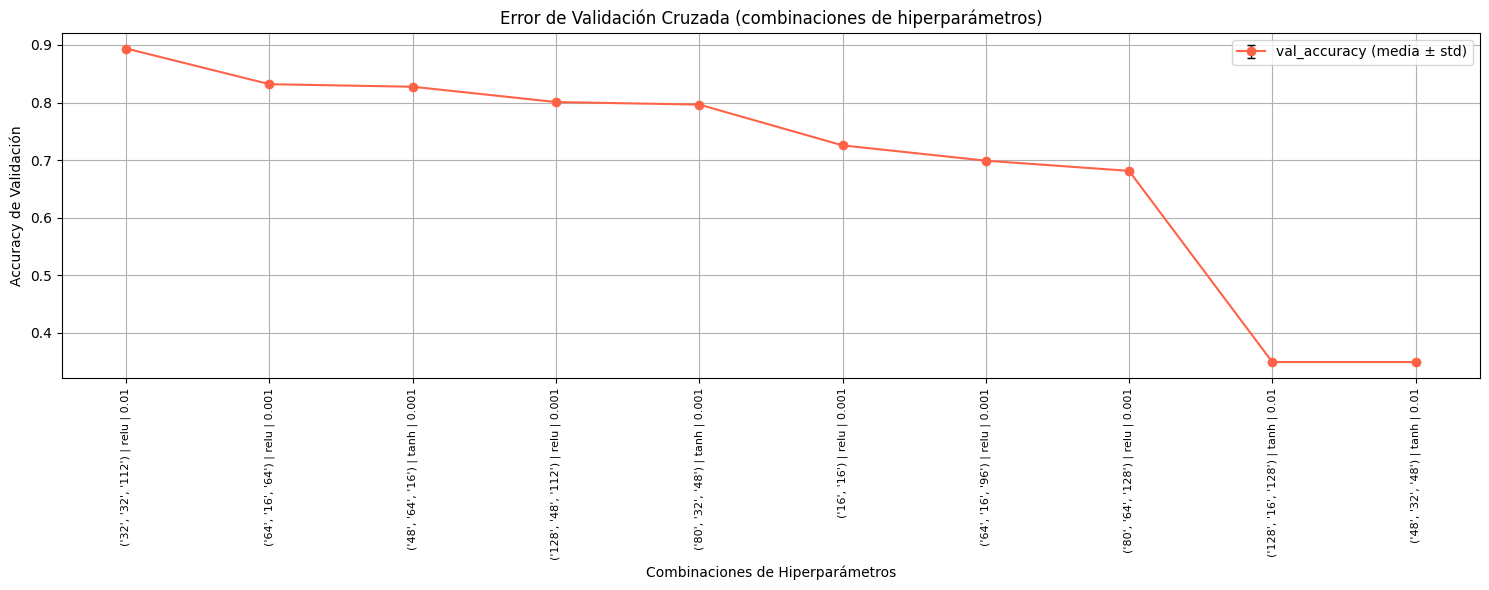

In [ ]:
# Formatear etiqueta combinada
def format_label(row):
    capas = []
    for i in range(3):
        key = f'units_{i}'
        if key in row and pd.notnull(row[key]):
            capas.append(str(int(row[key])))
    capa_str = '-'.join(capas) if capas else "ninguna"
    return f"{tuple(capas)} | {row['activation']} | {row['learning_rate']}"

results_df['comb_label'] = results_df.apply(format_label, axis=1)


# Agrupar por combinaciones únicas
grouped = results_df.groupby('comb_label')['val_accuracy'].agg(['mean', 'std']).reset_index()
grouped = grouped.sort_values(by='mean', ascending=False).reset_index(drop=True)
# Plot estilo validación cruzada
plt.figure(figsize=(15, 6))
plt.errorbar(
    x=range(len(grouped)),
    y=grouped['mean'],
    yerr=grouped['std'],
    fmt='o-', color='tomato',
    ecolor='black', elinewidth=1, capsize=3,
    label='val_accuracy (media ± std)'
)

plt.xticks(ticks=range(len(grouped)), labels=grouped['comb_label'], rotation=90, fontsize=8)
plt.xlabel("Combinaciones de Hiperparámetros")
plt.ylabel("Accuracy de Validación")
plt.title("Error de Validación Cruzada (combinaciones de hiperparámetros)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Observaciones clave:**

- Las primeras combinaciones (a la izquierda del gráfico), como por ejemplo `(128, 32 - 128) relu 0.001`, alcanzan precisiones de validación superiores al **85%**, indicando un rendimiento excelente.
  
- A medida que se avanza hacia configuraciones con **tasa de aprendizaje más alta** (`0.01`), se observa una **caída progresiva en el rendimiento**, lo que sugiere que tasas de aprendizaje muy elevadas dificultan la convergencia del modelo o provocan oscilaciones en la optimización.

- Las últimas configuraciones del gráfico muestran un descenso drástico de la precisión (~36%), lo que indica combinaciones no adecuadas, posiblemente con **arquitecturas demasiado grandes** o **mal ajustadas al problema**.

In [ ]:
print("Mejores hiperparámetros encontrados:")
print(tuner.get_best_hyperparameters(1)[0].values)

Mejores hiperparámetros encontrados:
{'n_layers': 2, 'units_0': 32, 'activation': 'relu', 'learning_rate': 0.01, 'units_1': 32, 'units_2': 112}


In [ ]:
best_hp = tuner.get_best_hyperparameters(1)[0]
best_model = tuner.hypermodel.build(best_hp)

history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3269 - loss: 109.9727
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2679 - loss: 15.7798
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3282 - loss: 7.2748
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3144 - loss: 13.1471
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3604 - loss: 9.3001
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3394 - loss: 3.2134
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4424 - loss: 2.1344
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5064 - loss: 1.7476
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4892 - loss: 1.9423
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6140 - loss: 0.9714
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5360 - loss: 1.0511
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5008 

In [ ]:
y_pred_prob = best_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


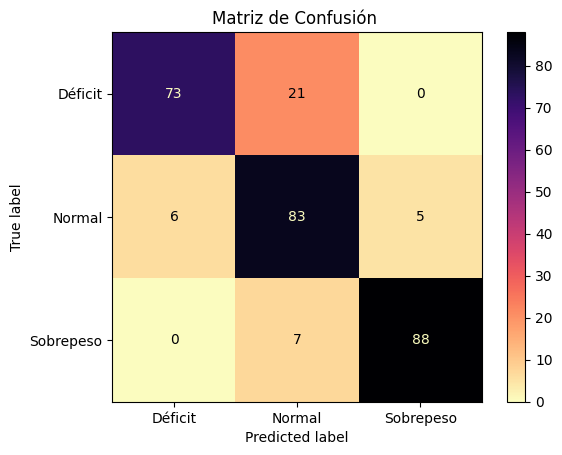

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Obtener la matriz
cm = confusion_matrix(y_test, y_pred)

# Etiquetas (solo si usaste LabelEncoder)
labels = le.classes_ if le else None

# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='magma_r', values_format='d')
plt.title("Matriz de Confusión ")
plt.show()


**Clase "Déficit"**:
  - 73 gestantes fueron correctamente clasificadas.
  - 21 fueron mal clasificadas como *Normal*.
  - 0 como *Sobrepeso*.   
**Aunque se observa cierta confusión con *Normal*, el modelo muestra buena sensibilidad para detectar casos de déficit. **

**Clase "Normal"**:
  - 83 clasificaciones correctas.
  - 6 mal clasificadas como *Déficit*.
  - 5 como *Sobrepeso*.  
**Esta clase presenta el mejor equilibrio entre sensibilidad y precisión.**

**Clase "Sobrepeso"**:
  - 88 casos correctamente identificados.
  - 7 casos mal clasificados como *Normal*.
  - 0 clasificaciones erróneas como *Déficit*.  
**Excelente desempeño, con muy pocas confusiones.**


In [ ]:
# Reporte de clasificación
if le:
    print("Reporte de clasificación:\n", classification_report(y_test, y_pred, target_names=le.classes_))
else:
    print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

print("Accuracy en test:", accuracy_score(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

     Déficit       0.92      0.78      0.84        94
      Normal       0.75      0.88      0.81        94
   Sobrepeso       0.95      0.93      0.94        95

    accuracy                           0.86       283
   macro avg       0.87      0.86      0.86       283
weighted avg       0.87      0.86      0.86       283

Accuracy en test: 0.8621908127208481


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas agregadas (ponderadas)
accuracy_rnn_2 = accuracy_score(y_test, y_pred)
precision_rnn_2 = precision_score(y_test, y_pred, average='weighted')
recall_rnn_2 = recall_score(y_test, y_pred, average='weighted')
f1_rnn_2 = f1_score(y_test, y_pred, average='weighted')

# Mostrar resultados
print("\nMétricas del Mejor Modelo (KerasTuner):")
print(f" Accuracy: {accuracy_rnn_2:.4f}")
print(f" Precision (ponderada): {precision_rnn_2:.4f}")
print(f" Recall (ponderado): {recall_rnn_2:.4f}")
print(f" F1-score (ponderado): {f1_rnn_2:.4f}")



Métricas del Mejor Modelo (KerasTuner):
 Accuracy: 0.8622
 Precision (ponderada): 0.8729
 Recall (ponderado): 0.8622
 F1-score (ponderado): 0.8635


In [ ]:
# Crear DataFrame comparativo
df_comparacion_rn = pd.DataFrame({
    'Modelo': ['RNN MLPClassifier', ' RNN KerasTuner'],
    'Accuracy': [accuracy_rnn_1, accuracy_rnn_2],
    'Precision': [precision_rnn_1, precision_rnn_2],
    'Recall': [recall_rnn_1, recall_rnn_2],
    'F1-Score': [f1_rnn_1, f1_rnn_2]
})

# Mostrar tabla
print("Comparación de redes neuronales:")
from IPython.display import display
display(df_comparacion_rn)

Comparación de redes neuronales:


,Modelo,Accuracy,Precision,Recall,F1-Score
0,RNN MLPClassifier,0.851590,0.850360,0.851590,0.847119
1,RNN KerasTuner,0.862191,0.872938,0.862191,0.863543


In [ ]:
import pickle

best_rnn = grid_search_mlp.best_estimator_
pickle.dump(best_rnn, open('mlp_classifier_model.pkl', 'wb'))